In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
#Converting the non numbers into numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cols in df.columns:
    if df[cols].dtype == "object":
        df[cols] = le.fit_transform(df[cols])

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Axes: >

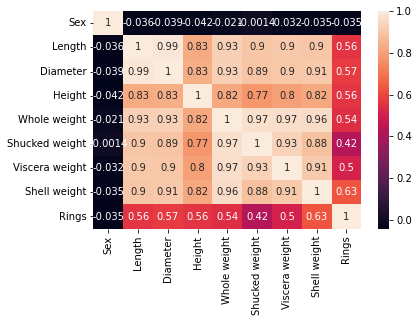

In [8]:
sns.heatmap(df.corr(), annot= True)

In [9]:
x = df[["Length", "Diameter", "Height", "Shucked weight", "Shell weight"]]
y = df[["Rings"]]

In [11]:
#Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sc = sc.fit_transform(x)

#PCA : Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_sc)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K means code
best_k = -1
best_score = -1

for k in range(2,10):
    model = KMeans(k)
    model.fit(x_pca)
    labels = model.labels_
    score = silhouette_score(x_pca, labels)

    if score > best_score:
        best_k = k
        best_score = score 

In [14]:
print(best_k, best_score)

2 0.5471918603984823


<Axes: >

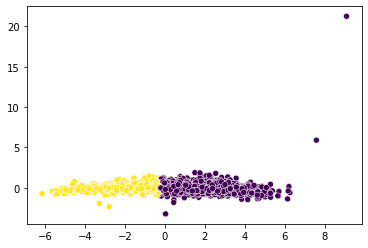

In [16]:
#Now lets display that
model = KMeans(2)
model.fit(x_pca)
labels = model.labels_

sns.scatterplot(x = x_pca[:,0], y=x_pca[:,1], c = labels)